In [1]:
import numpy as np
import pandas as pd

def to_Roman_Numeral(number):
    out=""
    ones = number % 10
    tens = (number % 100)-ones
    hundreds = (number % 1000)-tens-ones

    if number >= 1000:
        for i in range(0,int(number/1000)):
            out += "M"

    out += (ones_to_RM(hundreds,"C","D","M") + ones_to_RM(tens,"X","L","C") + ones_to_RM(ones,"I","V","X"))
    return out

def ones_to_RM(num, singles, fives, tens):
    if num >= 10:
        num = int(num/10)
    if num >= 10:
        num = int(num/10)
    less_five = num % 5
    out=""
    if num>=5:
        out+=fives
    if less_five<=3:
        for i in range(1,less_five+1):
            out += singles
    if less_five == 4:
        if num == 4:
            return singles+fives
        if num == 9:
            return singles+tens
    return out


def smoothTriangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    # Handle boundaries
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

all=pd.DataFrame(columns=["numeral","length"])
for i in range(0,4000):
    #print(ones_to_RM(i,"I","V","X"))
    print(str(i),":",to_Roman_Numeral(i))
    all.at[i,"numeral"] = to_Roman_Numeral(i)
    all.at[i,"length"] = len(to_Roman_Numeral(i))

all.to_csv("all.csv")

0 : 
1 : I
2 : II
3 : III
4 : IV
5 : V
6 : VI
7 : VII
8 : VIII
9 : IX
10 : X
11 : XI
12 : XII
13 : XIII
14 : XIV
15 : XV
16 : XVI
17 : XVII
18 : XVIII
19 : XIX
20 : XX
21 : XXI
22 : XXII
23 : XXIII
24 : XXIV
25 : XXV
26 : XXVI
27 : XXVII
28 : XXVIII
29 : XXIX
30 : XXX
31 : XXXI
32 : XXXII
33 : XXXIII
34 : XXXIV
35 : XXXV
36 : XXXVI
37 : XXXVII
38 : XXXVIII
39 : XXXIX
40 : XL
41 : XLI
42 : XLII
43 : XLIII
44 : XLIV
45 : XLV
46 : XLVI
47 : XLVII
48 : XLVIII
49 : XLIX
50 : L
51 : LI
52 : LII
53 : LIII
54 : LIV
55 : LV
56 : LVI
57 : LVII
58 : LVIII
59 : LIX
60 : LX
61 : LXI
62 : LXII
63 : LXIII
64 : LXIV
65 : LXV
66 : LXVI
67 : LXVII
68 : LXVIII
69 : LXIX
70 : LXX
71 : LXXI
72 : LXXII
73 : LXXIII
74 : LXXIV
75 : LXXV
76 : LXXVI
77 : LXXVII
78 : LXXVIII
79 : LXXIX
80 : LXXX
81 : LXXXI
82 : LXXXII
83 : LXXXIII
84 : LXXXIV
85 : LXXXV
86 : LXXXVI
87 : LXXXVII
88 : LXXXVIII
89 : LXXXIX
90 : XC
91 : XCI
92 : XCII
93 : XCIII
94 : XCIV
95 : XCV
96 : XCVI
97 : XCVII
98 : XCVIII
99 : XCIX
100 : C
10

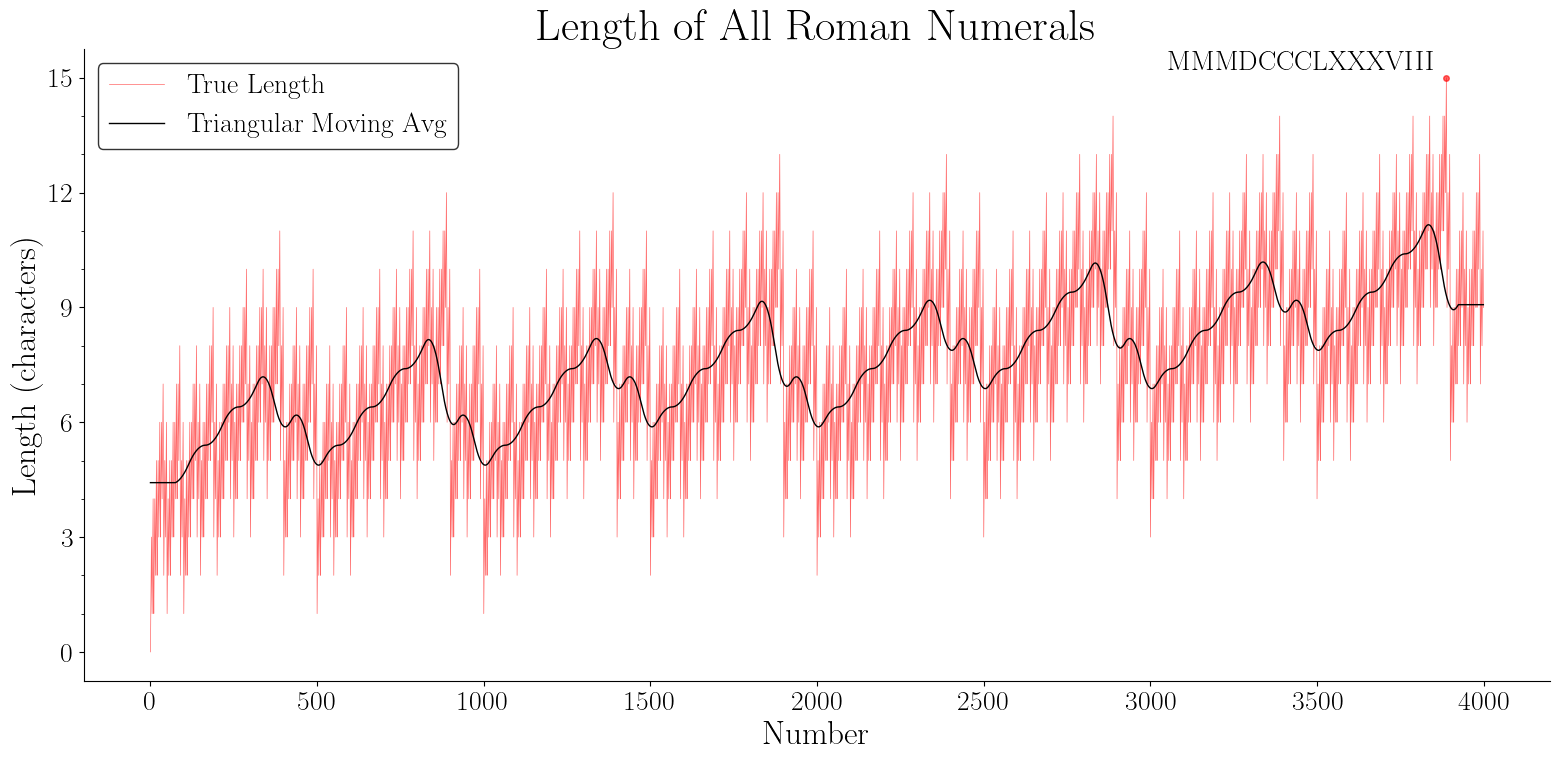

In [33]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
import numpy as np
from scipy import interpolate

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'Georgia',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.autolayout' : True,
})
font = {'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

nums=[]
x= range(0,4000)
for i in x:
    nums.append(len(to_Roman_Numeral(i)))

x_new = np.linspace(1,200,500)
bspline = interpolate.make_interp_spline(x, nums)
y_new=bspline(x_new)

fig, ax = plt.subplots(figsize = (16,8))
ax.plot(x,nums, linewidth=0.5,alpha=0.6,c='red',label="True Length")
ax.plot(x,smoothTriangle(nums,50),linewidth=1,c='black',label="Triangular Moving Avg")
ax.text(3855,15.2,'MMMDCCCLXXXVIII',horizontalalignment='right')
ax.plot(3888,15,marker='.',c='red',alpha=0.6, markersize=8)
ax.set_title("Length of All Roman Numerals", fontsize=32)
ax.set_ylabel("Length (characters)",fontsize=24)
ax.set_xlabel("Number",fontsize=24)
ax.set_yticks(range(0,16,3))
ax.minorticks_on()
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.legend(edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("roman numerals plot 2.pdf")
#fig.savefig("romans.png",dpi=400)

#fig.savefig("mobile.png",dpi=400)